## PROJEKT 2: Algorytm Genetyczny 

### Problem komiwojażera:

Traveling Salesman Problem to klasyczne zagadnienie optymalizacyjne w matematyce i informatyce. Polega na tym, aby znaleźć najkrótszą trasę łączącą zbiór miast, przy czym każde miasto ma zostać odwiedzone tylko raz i komiwojażer ma wrócić do punktu wyjścia. 

In [1]:
import alg_gen_funkcje_pomocnicze as f
import matplotlib.pyplot as plt
from IPython.display import clear_output
import numpy as np
import math
import random

In [2]:
# ================================ PARAMETRY ======================
number_of_cities = 20 #ustawimy do 50
number_of_generations = 200 # tyle razy wykonujemy pętlę dla pokolenia
population_size = 3000 # liczba osobnikow w jednej generacji
mutation_probability = 0.1



Poniżej znajduje się testowy zestaw punktów, które są rozmieszczone na okręgu. Takie rozmieszczenie punktów ułatwia ocenę jakości algorytmów w warunkach kontrolowanych, gdzie dystanse między węzłami mają charakter regularny.

In [55]:
n = 30
center_x = 150
center_y = 150
radius = 90
cities_list = []
# Generowanie miast
for i in range(n):
    angle = 2 * math.pi * i / n  # Kąt w radianach
    x = center_x + radius * math.cos(angle)
    y = center_y + radius * math.sin(angle)
    cities_list.append(f.City(i + 1, x, y)) 

random.shuffle(cities_list)

W przypadku, gdy celem jest odwzorowanie bardziej realistycznych, losowo rozproszonych lokalizacji, korzysta się z funkcji przedstawionej poniżej, generującej punkty w sposób stochastyczny.

In [3]:
cities_list = f.generate_cities(number_of_cities)


Utworzenie populacji początkowej

In [4]:
population = f.generate_population(cities_list, population_size)


Dla każdej trasy (chromosomu) obliczana jest wartość funkcji celu oraz prawdopodobieństwa potrzebne do wyboru do kolejnej populacji. Prawdopodobieństwa wyboru danego osobnika do dalszego rozrodu są odwrotnie proporcjonalne do jego długości trasy – lepsze trasy mają większe szanse:

In [5]:
fitness_f=[f.fitness_function(chromosom) for chromosom in population]
best_dist = min(fitness_f) 
history_best = [best_dist]
gen_best = [best_dist]
best_index = fitness_f.index(best_dist) 
inv_fitness = [1 / x for x in fitness_f]
sum_inv = sum(inv_fitness)
#probabilities = [x / sum_inv for x in inv_fitness]
probabilities = [best_dist / x for x in fitness_f]


Zapisano najlepsze rozwiązanie w każdym pokoleniu - do wizualizacji.
Algorytm przechodzi przez kolejne pokolenia. W każdej iteracji generowana jest nowa populacja za pomocą operatorów genetycznych.Jeśli przez 50 kolejnych pokoleń nie nastąpi poprawa, algorytm się zatrzymuje.W każdej iteracji aktualne najlepsze rozwiązanie jest wizualizowane, co pozwala śledzić przebieg ewolucji.

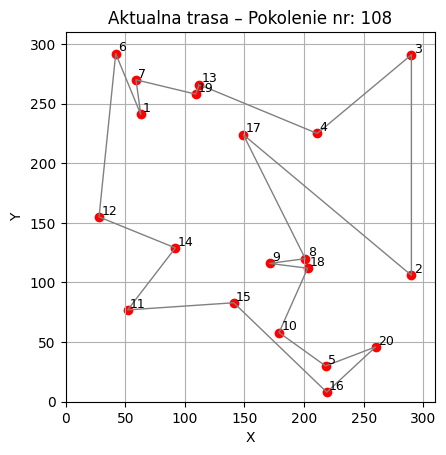

Najlepsza znaleziona ścieżka: 1579.90


In [9]:
nr_gen = 1
no_change = 0
best_res = population[best_index]
f.vizualize(best_res, nr_gen)


while nr_gen < number_of_generations and no_change<90:
    population = f.generate_new_population(population, population_size, probabilities, mutation_probability) # wykonuje crossover i mutation
    fitness_f=[f.fitness_function(chromosom) for chromosom in population]
    new_best_dist = min(fitness_f) # najlepszy w tym pokoleniu
    gen_best.append(new_best_dist)
    new_best_index = fitness_f.index(new_best_dist) 
    new_best_res = population[new_best_index]
    probabilities = [new_best_dist / x for x in fitness_f]
    if new_best_dist < best_dist:
        best_dist = new_best_dist
        history_best.append(best_dist)
        best_res = new_best_res
        no_change=0
    else: 
        no_change +=1
    f.vizualize(best_res, nr_gen)
    
    nr_gen +=1


print("Najlepsza znaleziona ścieżka: {:.2f}".format(best_dist))


Dodatkowa wizualizacja zmian wartości funkcji celu - czyli długości trasy dla najlepszego aktualnie rozwiązania

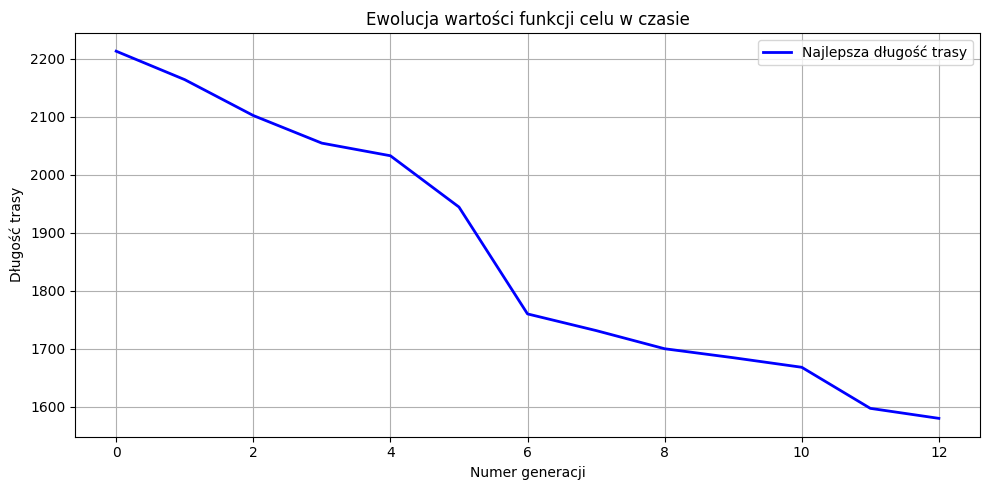

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(history_best, label='Najlepsza długość trasy', color='blue', linewidth=2)
plt.xlabel('Numer generacji')
plt.ylabel('Długość trasy')
plt.title('Ewolucja wartości funkcji celu w czasie')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Dla prównania, wizualizacja przedstawiająca najlepszą długość trasy w danym pokoleniu:

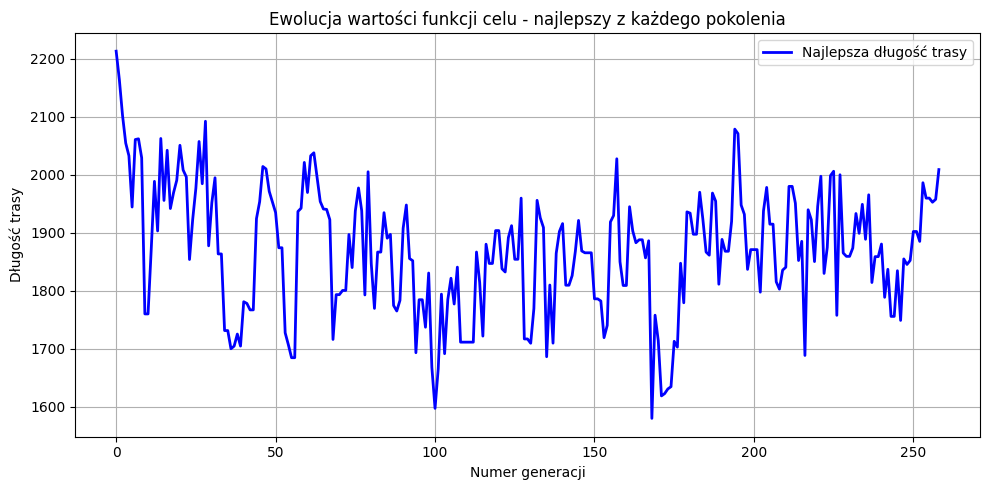

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(gen_best, label='Najlepsza długość trasy', color='blue', linewidth=2)
plt.xlabel('Numer generacji')
plt.ylabel('Długość trasy')
plt.title('Ewolucja wartości funkcji celu - najlepszy z każdego pokolenia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Algorytm eksploruje przestrzeń możliwych tras, prowadząc do stopniowej poprawy jakości rozwiązania w kolejnych generacjach.Ze względu na elementy stochastyczne (mutacja, selekcja), uzyskane rozwiązania róźnią się między uruchomieniami. Dzięki selekcji, crossoverowi i mutacji, algorytm dąży do globalnego minimum, choć zbieżność może ulec spowolnieniu, jeśli zabraknie różnorodności populacji.